## Predicting cell identity with CellTypist

## import packages

In [1]:
import scanpy as sc
import scipy as io
import pandas as pd

In [2]:
import celltypist
from celltypist import models

In [3]:
import matplotlib.pyplot as plt

In [4]:
sc.set_figure_params(dpi=100)

## import data

99255 cells × 36601 genes

In [5]:
adata = sc.read('/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/merged_unprocessed_db_filt_clustered_QCed_reclustered.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 99255 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 'scDblFi

In [7]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,doublet_amulet,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.0.2,seurat_clusters,Diff,doublet,wsnn_res.2
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,29946.0,7431,23298,22654,...,0,11260.0,4753,0.691594,0.308406,3,10,Diff_MK,0,2
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,90488.0,20806,21771,21165,...,0,11203.0,4435,0.168934,0.831066,4,1,Diff_MK,0,11


In [8]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC',
       'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads',
       'gex_conf_exonic_reads', 'gex_conf_intronic_reads',
       'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads',
       'gex_conf_exonic_dup_reads', 'gex_exonic_umis',
       'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads',
       'gex_conf_intronic_dup_reads', 'gex_intronic_umis',
       'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count',
       'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq',
       'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads',
       'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments',
       'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile',
       'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted',
       'scDblFinder.cx

# import model Alsinet

In [9]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_Alsinet.pkl')

In [10]:
new_model

CellTypist model with 18 cell types and 4199 features
    date: 2025-01-22 16:40:15.475078
    cell types: AdvancedMesoderm, EarlyFibroblasts, ..., iPSCs
    features: SAMD11, NOC2L, ..., MT-CYB

### apply the model to the object

In [11]:
adata.X.min()

0.0

In [12]:
adata.X.max()

7687.0

In [13]:
adata.raw = adata

In [14]:
adata.raw.X.min()

0.0

In [15]:
adata.raw.X.max()

7687.0

In [16]:
adata.X.expm1().sum(axis = 1)

matrix([[3.36649891e+072],
        [5.62262575e+067],
        [3.70488033e+151],
        ...,
        [2.26832912e+070],
        [3.73324200e+032],
        [1.53922577e+220]])

## Renormalize to log1p

In [17]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

In [18]:
sc.pp.log1p(adata)

In [19]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [20]:
#celltypist.annotate??

In [21]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 99255 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 4140 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [22]:
adata = predictions.to_adata()

In [23]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,SCT.weight,ATAC.weight,wsnn_res.0.2,seurat_clusters,Diff,doublet,wsnn_res.2,n_counts,predicted_labels,conf_score
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,29946.0,7431,23298,22654,...,0.691594,0.308406,3,10,Diff_MK,0,2,11643.0,iPSCs,0.800023
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,90488.0,20806,21771,21165,...,0.168934,0.831066,4,1,Diff_MK,0,11,10909.0,EarlyFibroblasts,0.003333


### visualize celltypist predictions

In [24]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
MastCells                      29171
Megakaryocytes                 26664
HemogenicEndothelium           11742
iPSCs                           7001
NeutrophilMyeloidProgenitor     6722
PrimitiveStreak                 6265
EarlyFibroblasts                3379
Mono-DCprec                     2091
AdvancedMesoderm                1626
Monocytes                        940
Endoderm                         643
Fibroblasts                      590
MesoEcto                         546
Macrophages                      508
ErythrocyteLineage               461
NeuralCrest                      416
EmergentMesoderm                 299
MyeloidProgenitors               191
Name: count, dtype: int64

In [25]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
MastCells                      True
Megakaryocytes                 True
HemogenicEndothelium           True
iPSCs                          True
NeutrophilMyeloidProgenitor    True
PrimitiveStreak                True
EarlyFibroblasts               True
Mono-DCprec                    True
AdvancedMesoderm               True
Monocytes                      True
Endoderm                       True
Fibroblasts                    True
MesoEcto                       True
Macrophages                    True
ErythrocyteLineage             True
NeuralCrest                    True
EmergentMesoderm               True
MyeloidProgenitors             True
Name: count, dtype: bool

In [26]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
MastCells                      True
Megakaryocytes                 True
HemogenicEndothelium           True
iPSCs                          True
NeutrophilMyeloidProgenitor    True
PrimitiveStreak                True
EarlyFibroblasts               True
Mono-DCprec                    True
AdvancedMesoderm               True
Monocytes                      True
Endoderm                       True
Fibroblasts                    True
MesoEcto                       True
Macrophages                    True
ErythrocyteLineage             True
NeuralCrest                    True
EmergentMesoderm               True
MyeloidProgenitors             True
Name: count, dtype: bool

In [27]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 99255 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 

In [28]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

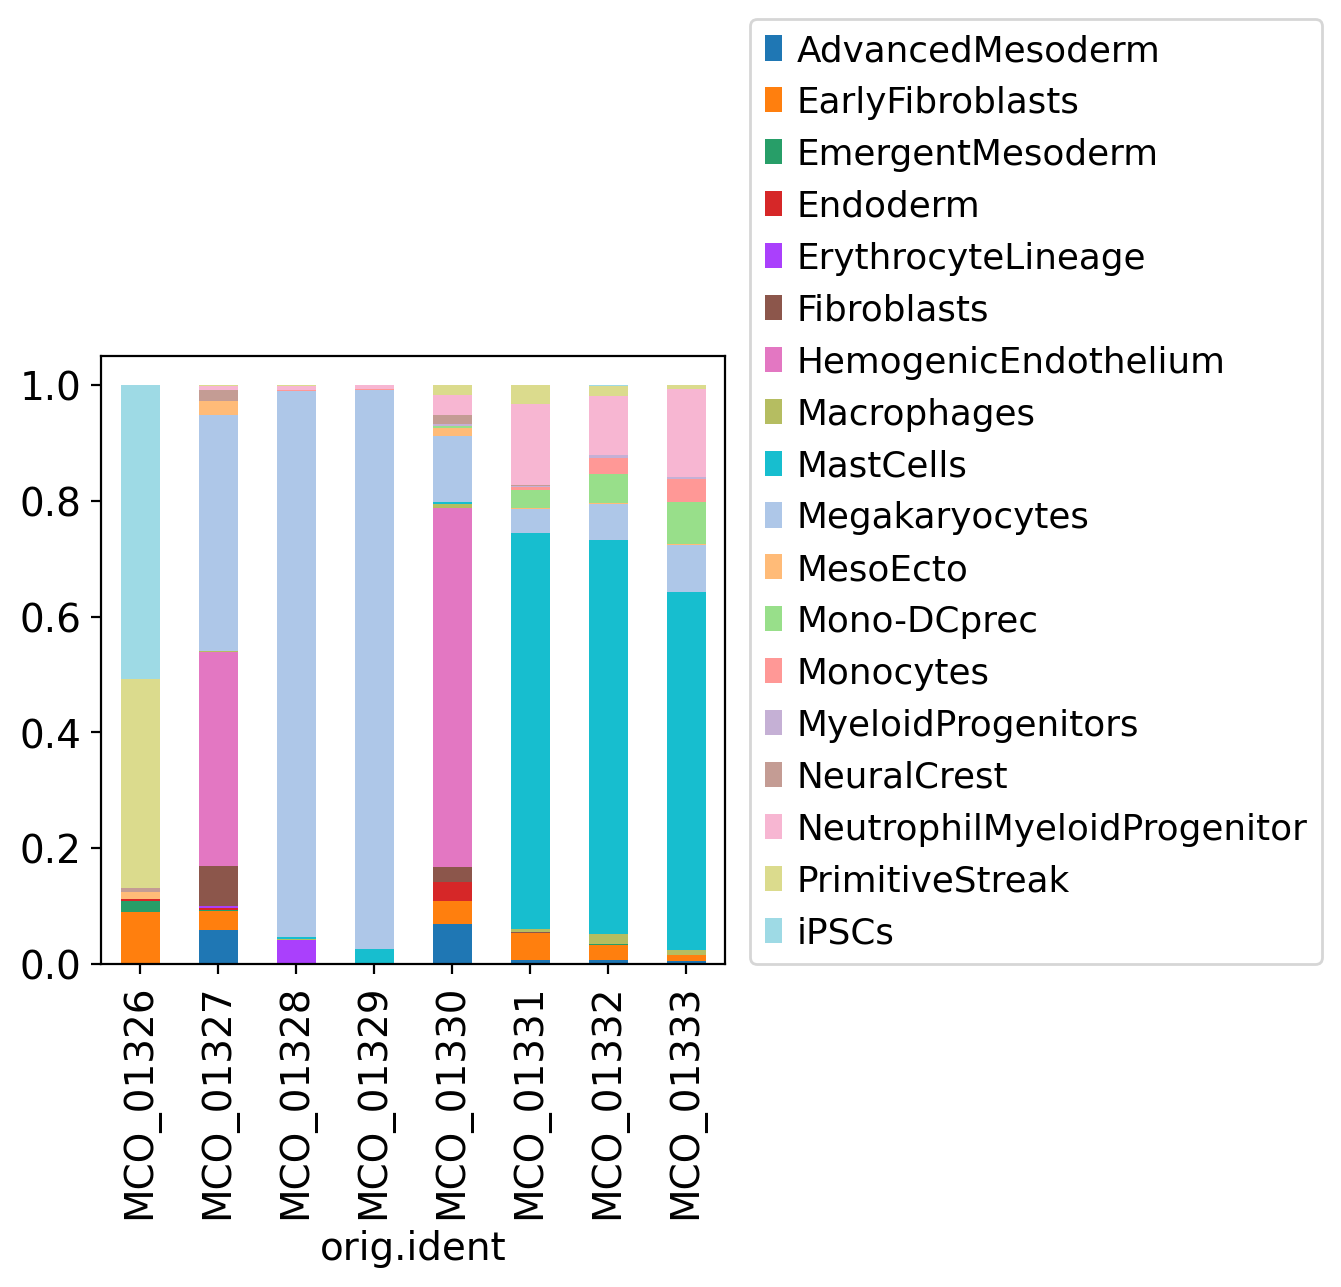

In [35]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [36]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [37]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [38]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [39]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [40]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [41]:
import os
from matplotlib import pyplot as plt


In [42]:
os.chdir("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/graphs/")

### checking confidence score

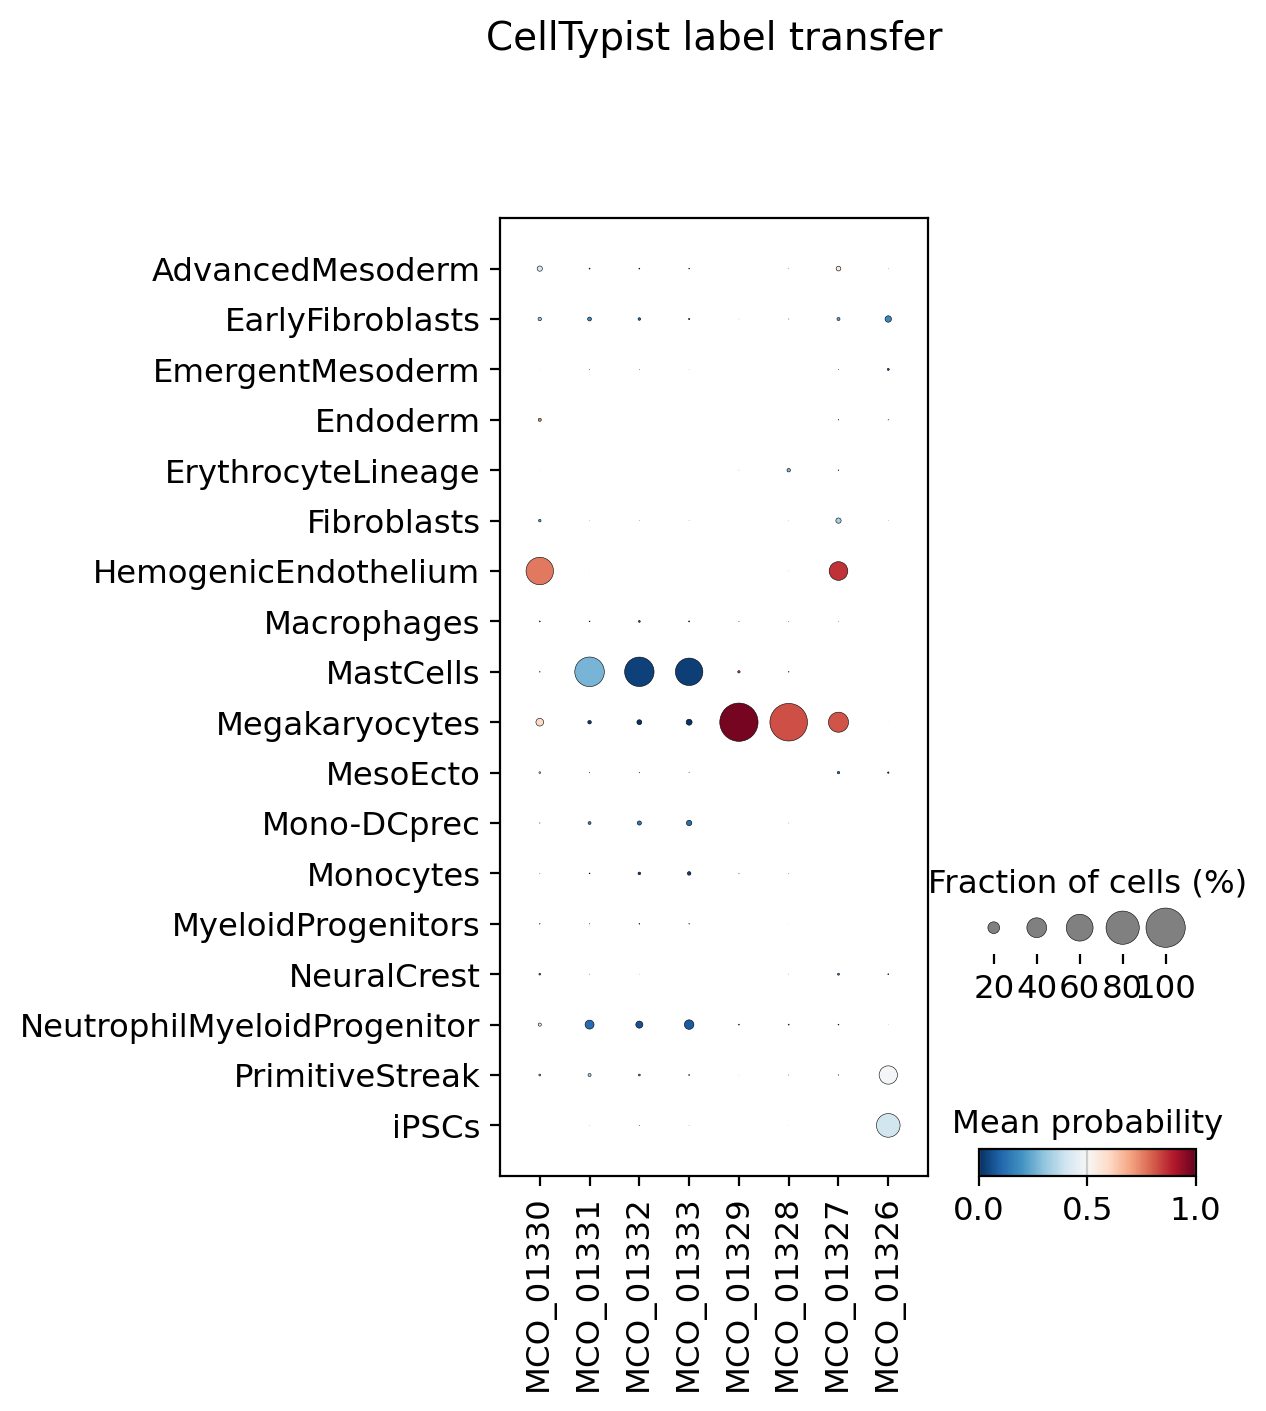

In [44]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_Alsinet.pdf')

In [46]:
#celltypist.dotplot??

### save results

In [47]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/Alsinet_celltypist_prediction.csv')

# import model f_BMA

In [48]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_from_BMA.pkl')

In [49]:
new_model

CellTypist model with 64 cell types and 6071 features
    date: 2024-04-09 21:20:12.035942
    cell types: CD14 monocyte, CD4 T cell, ..., tip EC
    features: SAMD11, HES4, ..., RGR

In [50]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [51]:
#celltypist.annotate??

In [52]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 99255 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 5671 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [53]:
adata = predictions.to_adata()

In [54]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,SCT.weight,ATAC.weight,wsnn_res.0.2,seurat_clusters,Diff,doublet,wsnn_res.2,n_counts,predicted_labels,conf_score
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,29946.0,7431,23298,22654,...,0.691594,0.308406,3,10,Diff_MK,0,2,11643.0,DC3,1.0
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,90488.0,20806,21771,21165,...,0.168934,0.831066,4,1,Diff_MK,0,11,10909.0,DC3,1.0


### visualize celltypist predictions

In [68]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
MK                         9213
DC3                        9142
CD56 bright NK             9052
CD4 T cell                 8722
late erythroid             7850
myelocyte                  7056
pre pro B progenitor       5683
GMP                        5633
tip EC                     4754
MEP                        2712
schwann cells              2506
sinusoidal EC              2434
early MK                   2423
promonocyte                2368
early erythroid            2139
NK T cell                  1514
neutrophil                 1344
mast cell                  1262
monocytoid macrophage      1074
osteoblast precursor       1047
pre B progenitor            994
eosinophil                  974
ELP                         917
naive B cell                902
CD14 monocyte               870
NK progenitor               816
osteoclast                  763
mid erythroid               740
MOP                         729
mature NK                   664
promyelocyte           

In [69]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
MK                          True
DC3                         True
CD56 bright NK              True
CD4 T cell                  True
late erythroid              True
myelocyte                   True
pre pro B progenitor        True
GMP                         True
tip EC                      True
MEP                         True
schwann cells               True
sinusoidal EC               True
early MK                    True
promonocyte                 True
early erythroid             True
NK T cell                   True
neutrophil                  True
mast cell                   True
monocytoid macrophage       True
osteoblast precursor        True
pre B progenitor            True
eosinophil                  True
ELP                         True
naive B cell                True
CD14 monocyte               True
NK progenitor               True
osteoclast                  True
mid erythroid               True
MOP                         True
mature NK                 

In [70]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
MK                          True
DC3                         True
CD56 bright NK              True
CD4 T cell                  True
late erythroid              True
myelocyte                   True
pre pro B progenitor        True
GMP                         True
tip EC                      True
MEP                         True
schwann cells               True
sinusoidal EC               True
early MK                    True
promonocyte                 True
early erythroid             True
NK T cell                   True
neutrophil                  True
mast cell                   True
monocytoid macrophage       True
osteoblast precursor        True
pre B progenitor            True
eosinophil                  True
ELP                         True
naive B cell                True
CD14 monocyte               True
NK progenitor               True
osteoclast                  True
mid erythroid               True
MOP                         True
mature NK                 

In [71]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 99013 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 

In [72]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

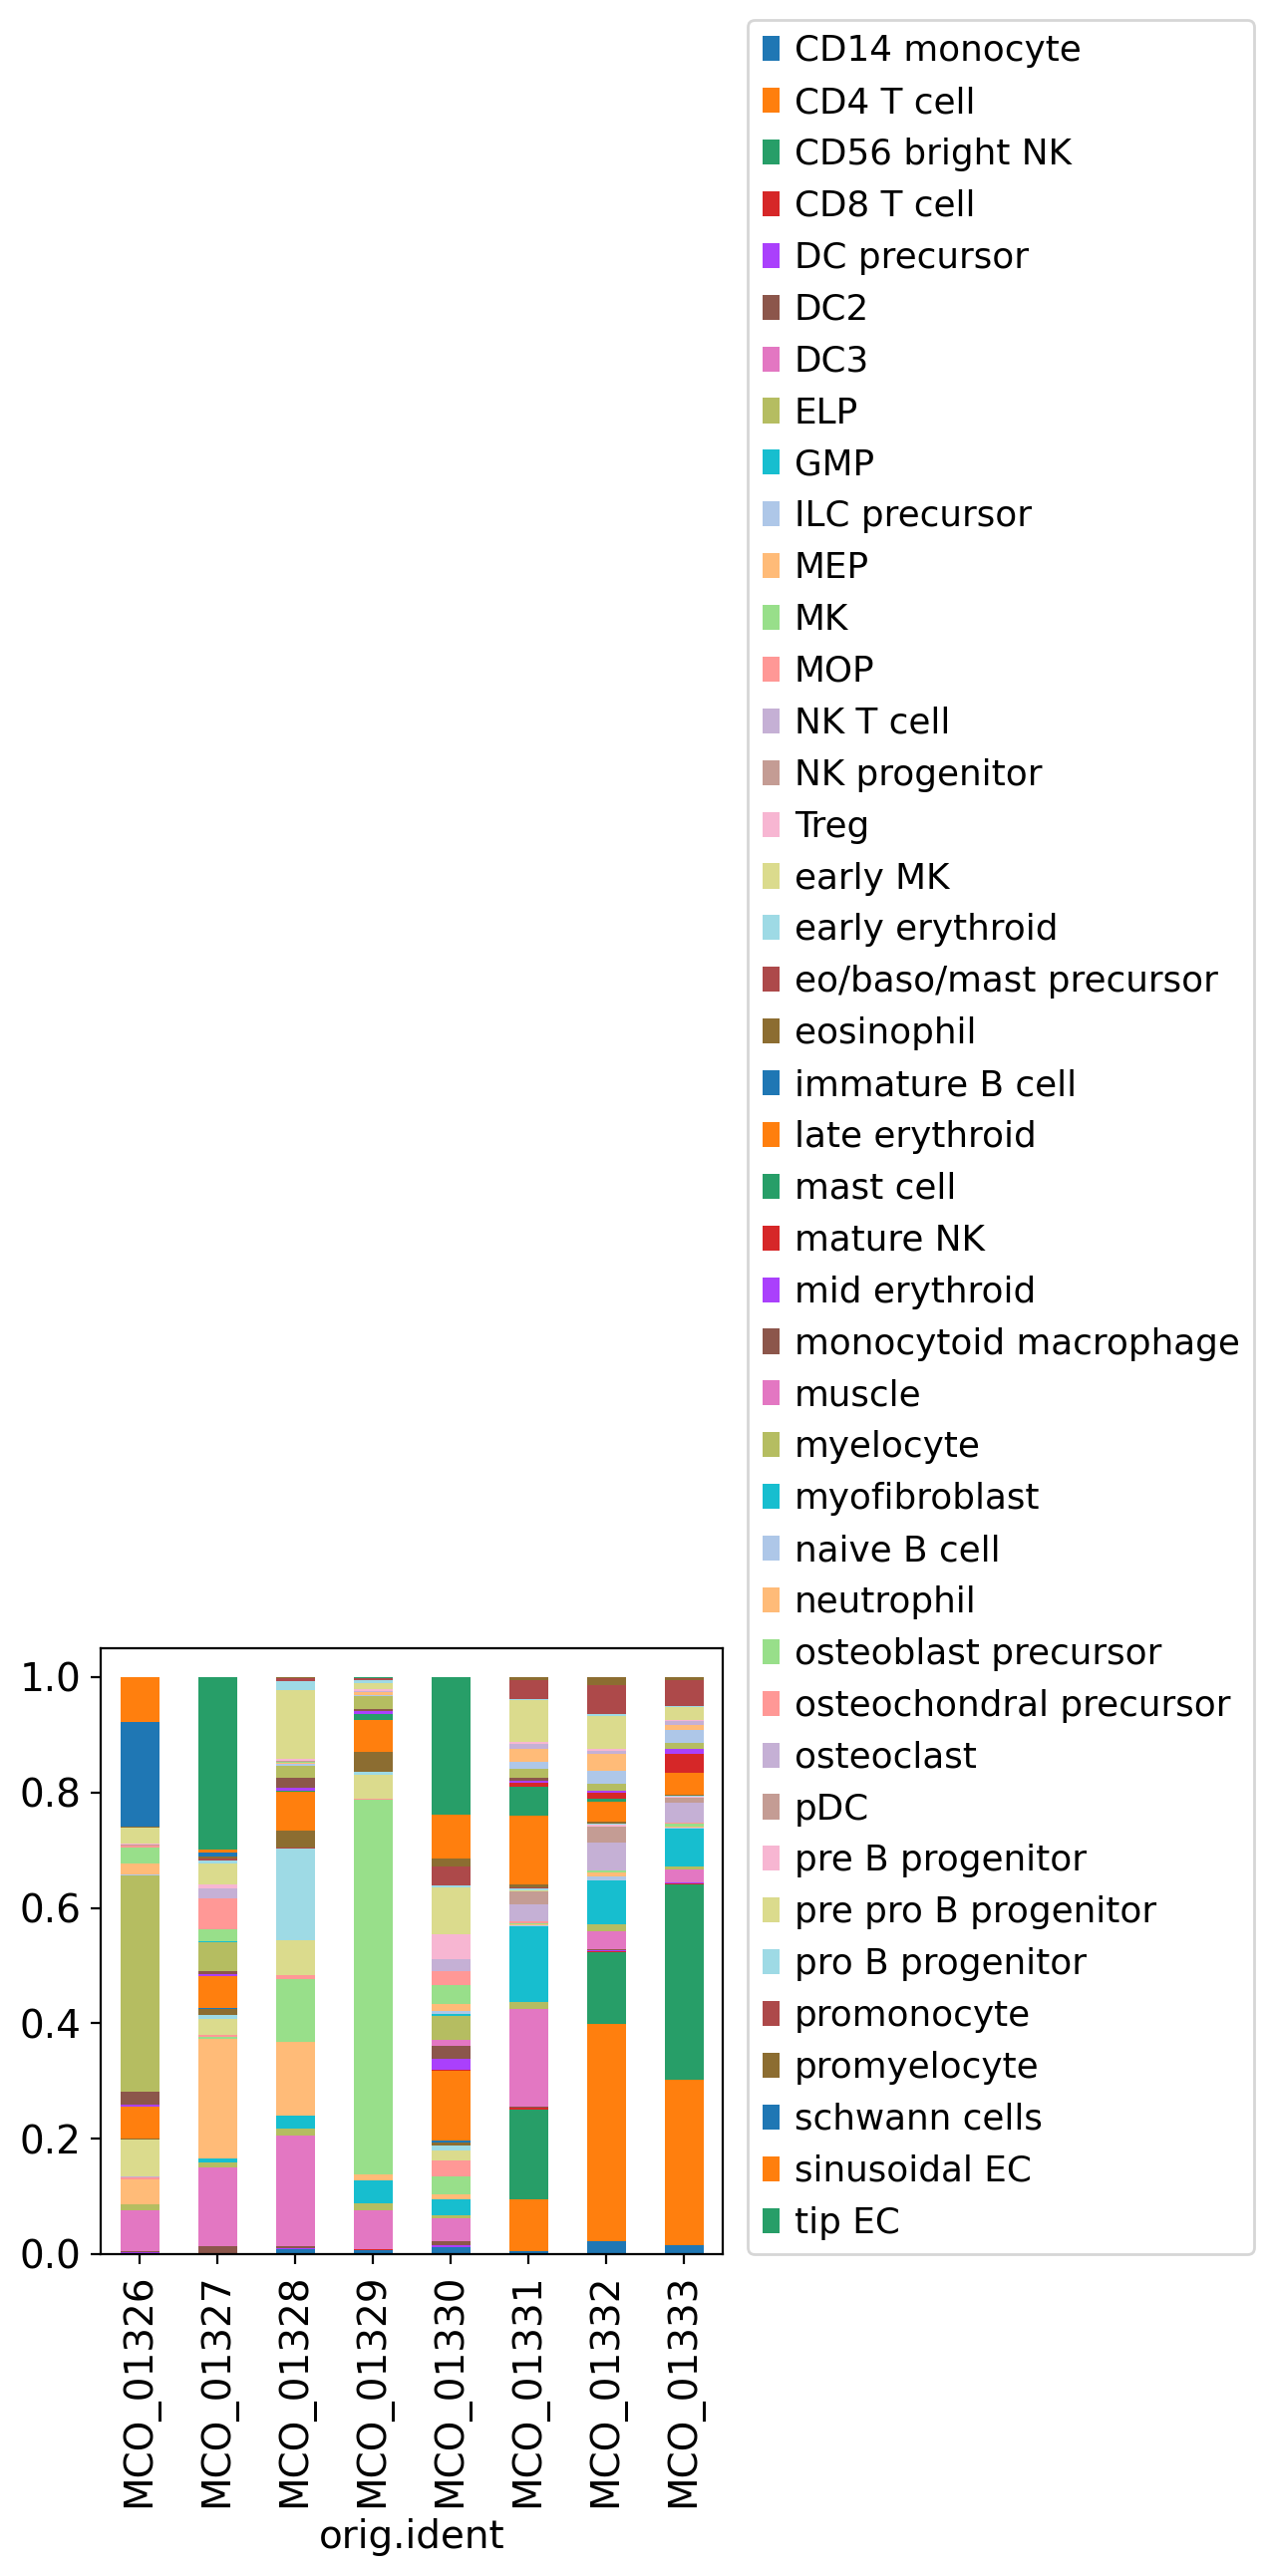

In [73]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [74]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [75]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [76]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [77]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [78]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [79]:
import os
from matplotlib import pyplot as plt


In [80]:
os.chdir("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/graphs/")

### checking confidence score

In [81]:
#celltypist.dotplot??

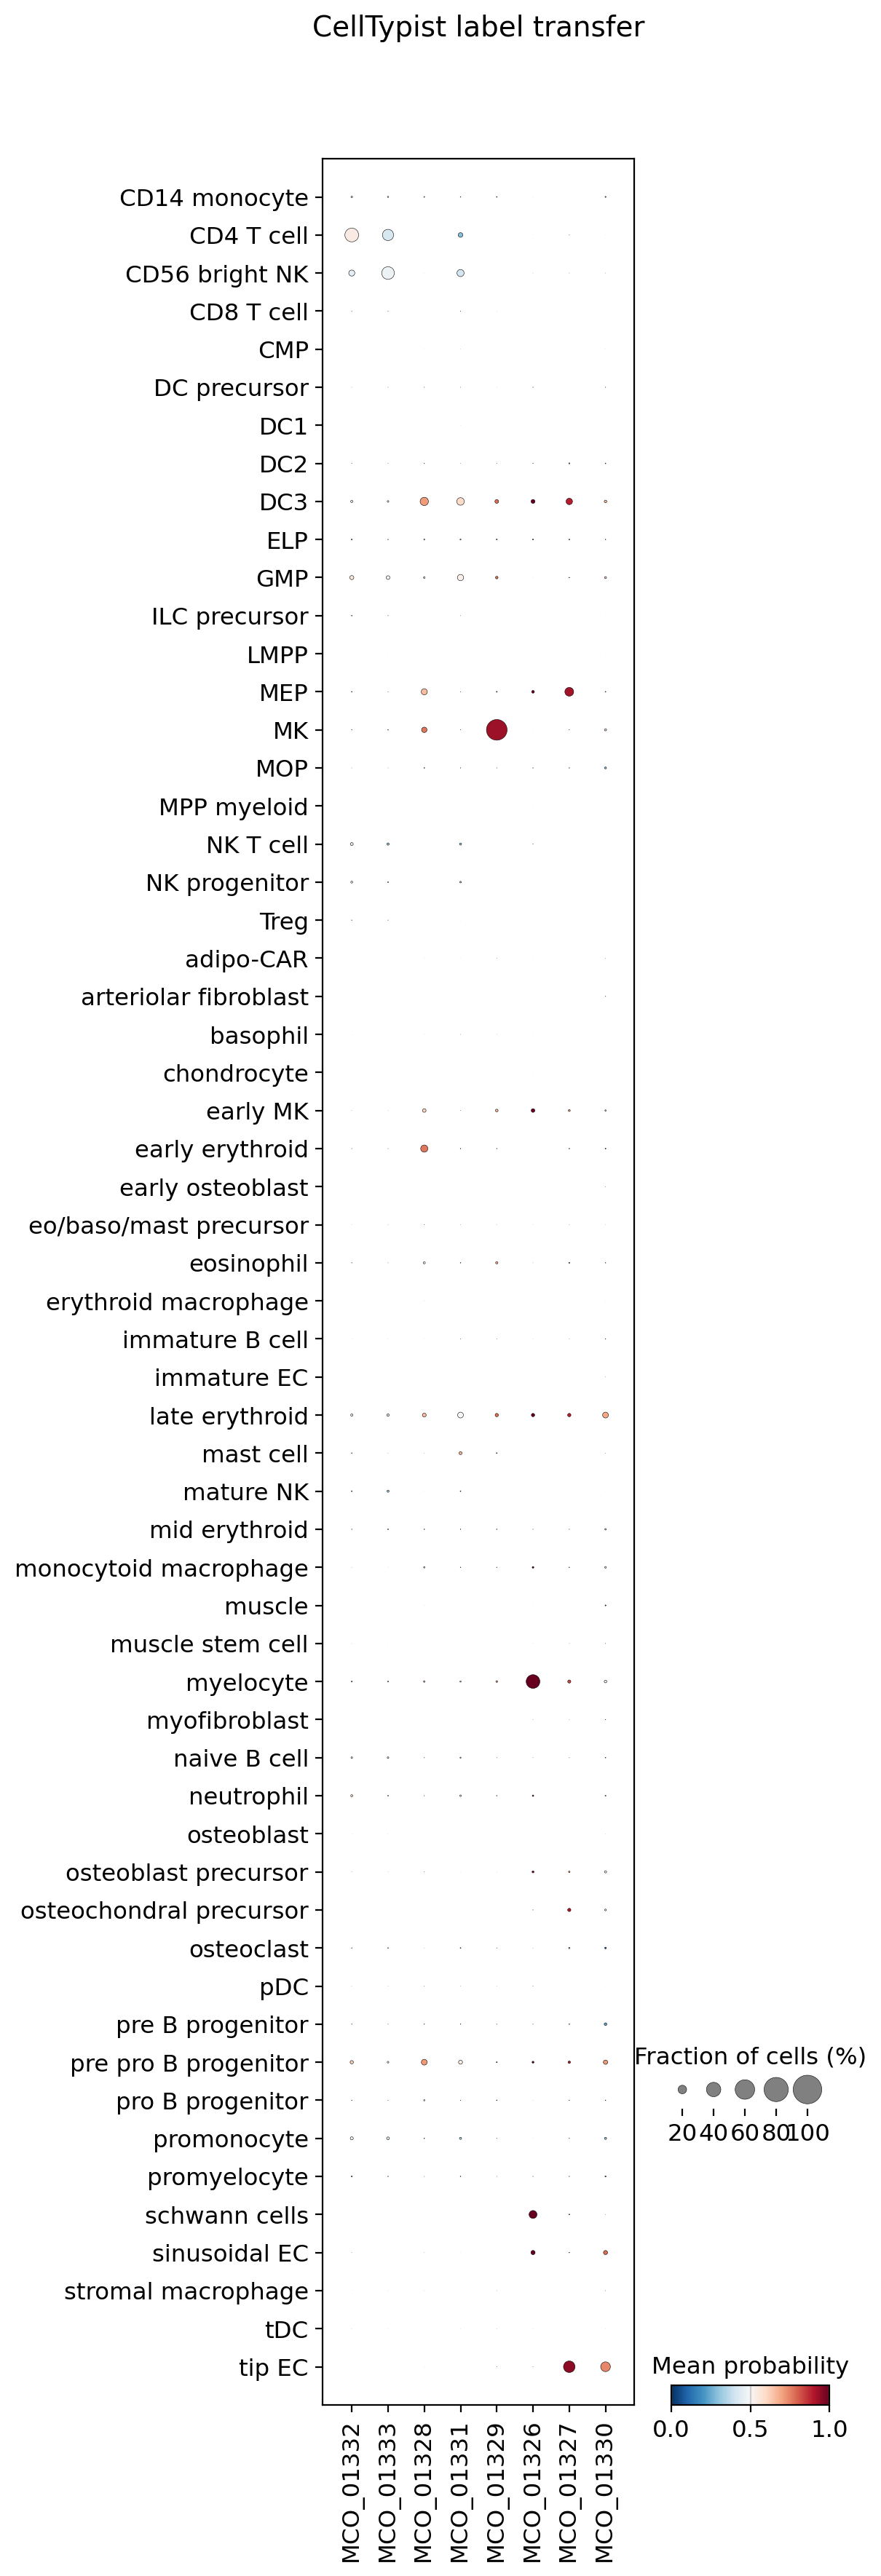

In [82]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_FBMA.pdf')

### save results

In [84]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/FBMA_celltypist_prediction.csv')

# import model Immune_All_Low

In [85]:
new_model = models.Model.load("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/Immune_All_Low.pkl")

In [86]:
new_model

CellTypist model with 98 cell types and 6639 features
    date: 2022-07-16 00:20:42.927778
    details: immune sub-populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: Age-associated B cells, Alveolar macrophages, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [87]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [88]:
#celltypist.annotate??

In [89]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 99255 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 6146 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [90]:
adata = predictions.to_adata()

In [91]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,SCT.weight,ATAC.weight,wsnn_res.0.2,seurat_clusters,Diff,doublet,wsnn_res.2,n_counts,predicted_labels,conf_score
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,29946.0,7431,23298,22654,...,0.691594,0.308406,3,10,Diff_MK,0,2,11643.0,Epithelial cells,1.0
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,90488.0,20806,21771,21165,...,0.168934,0.831066,4,1,Diff_MK,0,11,10909.0,Epithelial cells,1.0


### visualize celltypist predictions

In [92]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
Epithelial cells               17153
ILC3                           12813
CD16- NK cells                  9676
Endothelial cells               9412
Megakaryocytes/platelets        9075
                               ...  
Kidney-resident macrophages        1
Pro-B cells                        1
Cycling B cells                    1
Germinal center B cells            1
Granulocytes                       1
Name: count, Length: 86, dtype: int64

In [93]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
Epithelial cells                True
ILC3                            True
CD16- NK cells                  True
Endothelial cells               True
Megakaryocytes/platelets        True
                               ...  
Kidney-resident macrophages    False
Pro-B cells                    False
Cycling B cells                False
Germinal center B cells        False
Granulocytes                   False
Name: count, Length: 86, dtype: bool

In [94]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
Epithelial cells                True
ILC3                            True
CD16- NK cells                  True
Endothelial cells               True
Megakaryocytes/platelets        True
                               ...  
Kidney-resident macrophages    False
Pro-B cells                    False
Cycling B cells                False
Germinal center B cells        False
Granulocytes                   False
Name: count, Length: 86, dtype: bool

In [95]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 98763 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 

In [96]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

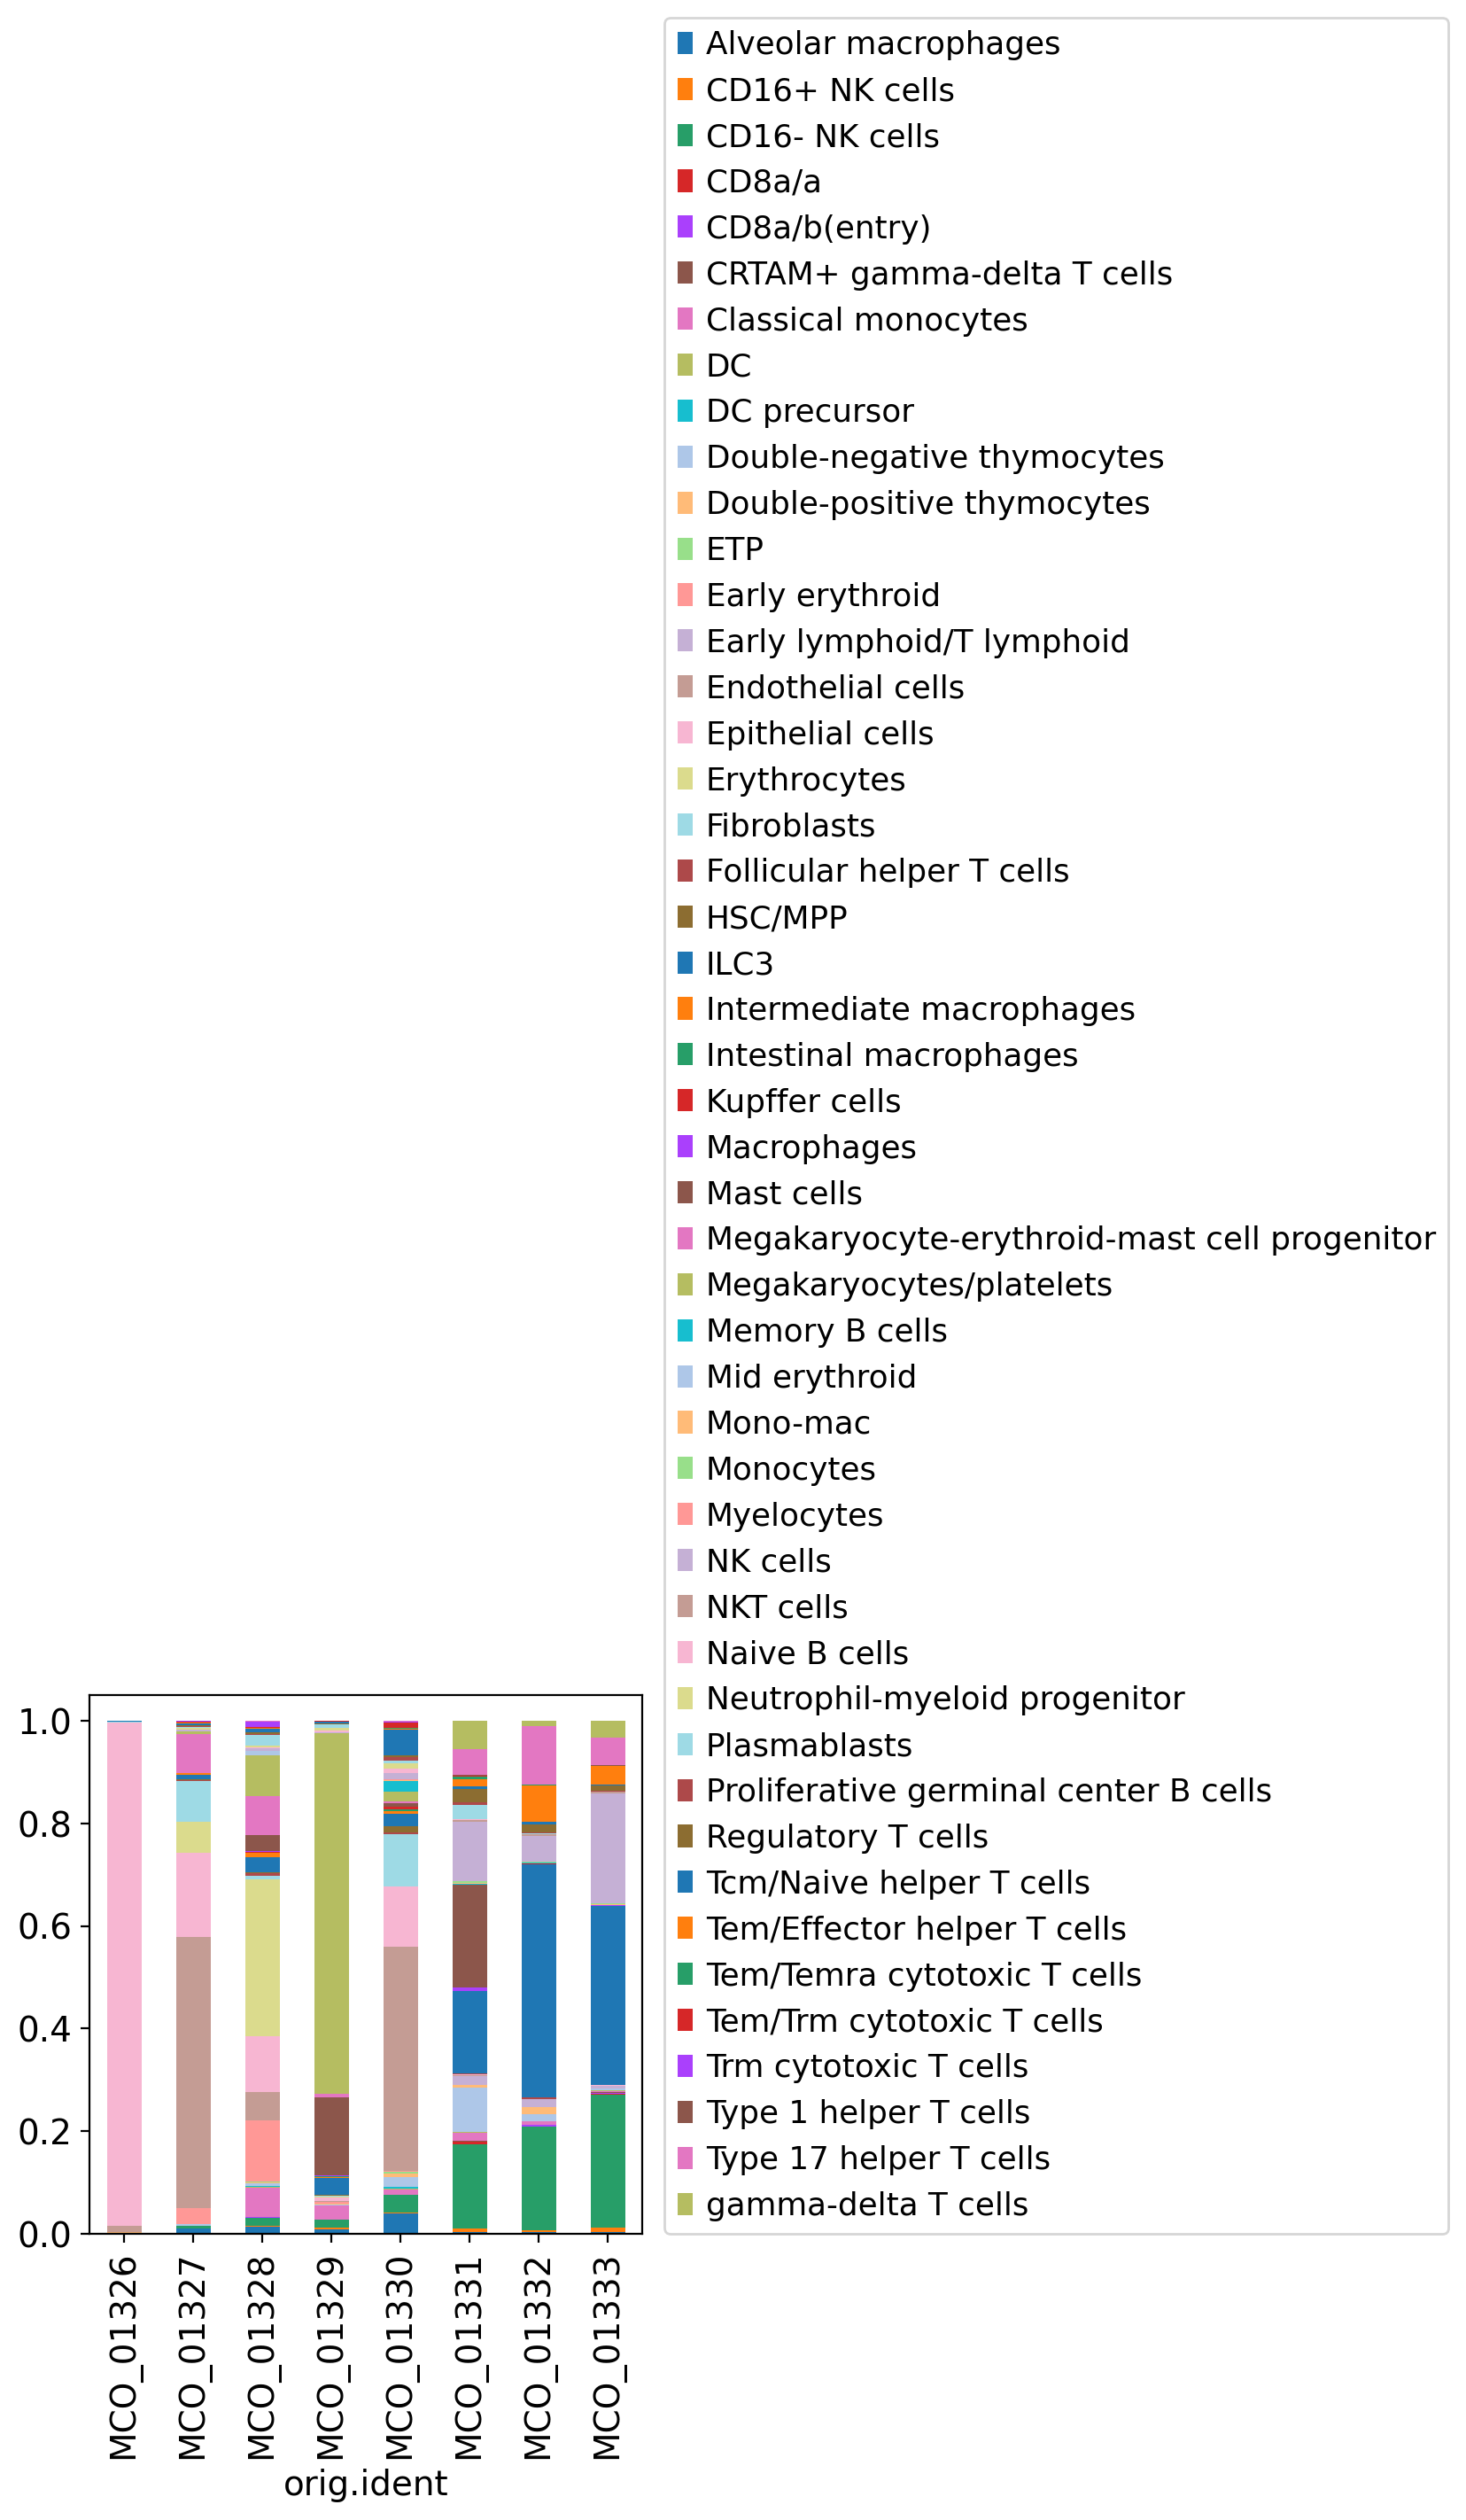

In [97]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [98]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [99]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [100]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [101]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [102]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [103]:
import os
from matplotlib import pyplot as plt


In [104]:
os.chdir("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/graphs/")

### checking confidence score

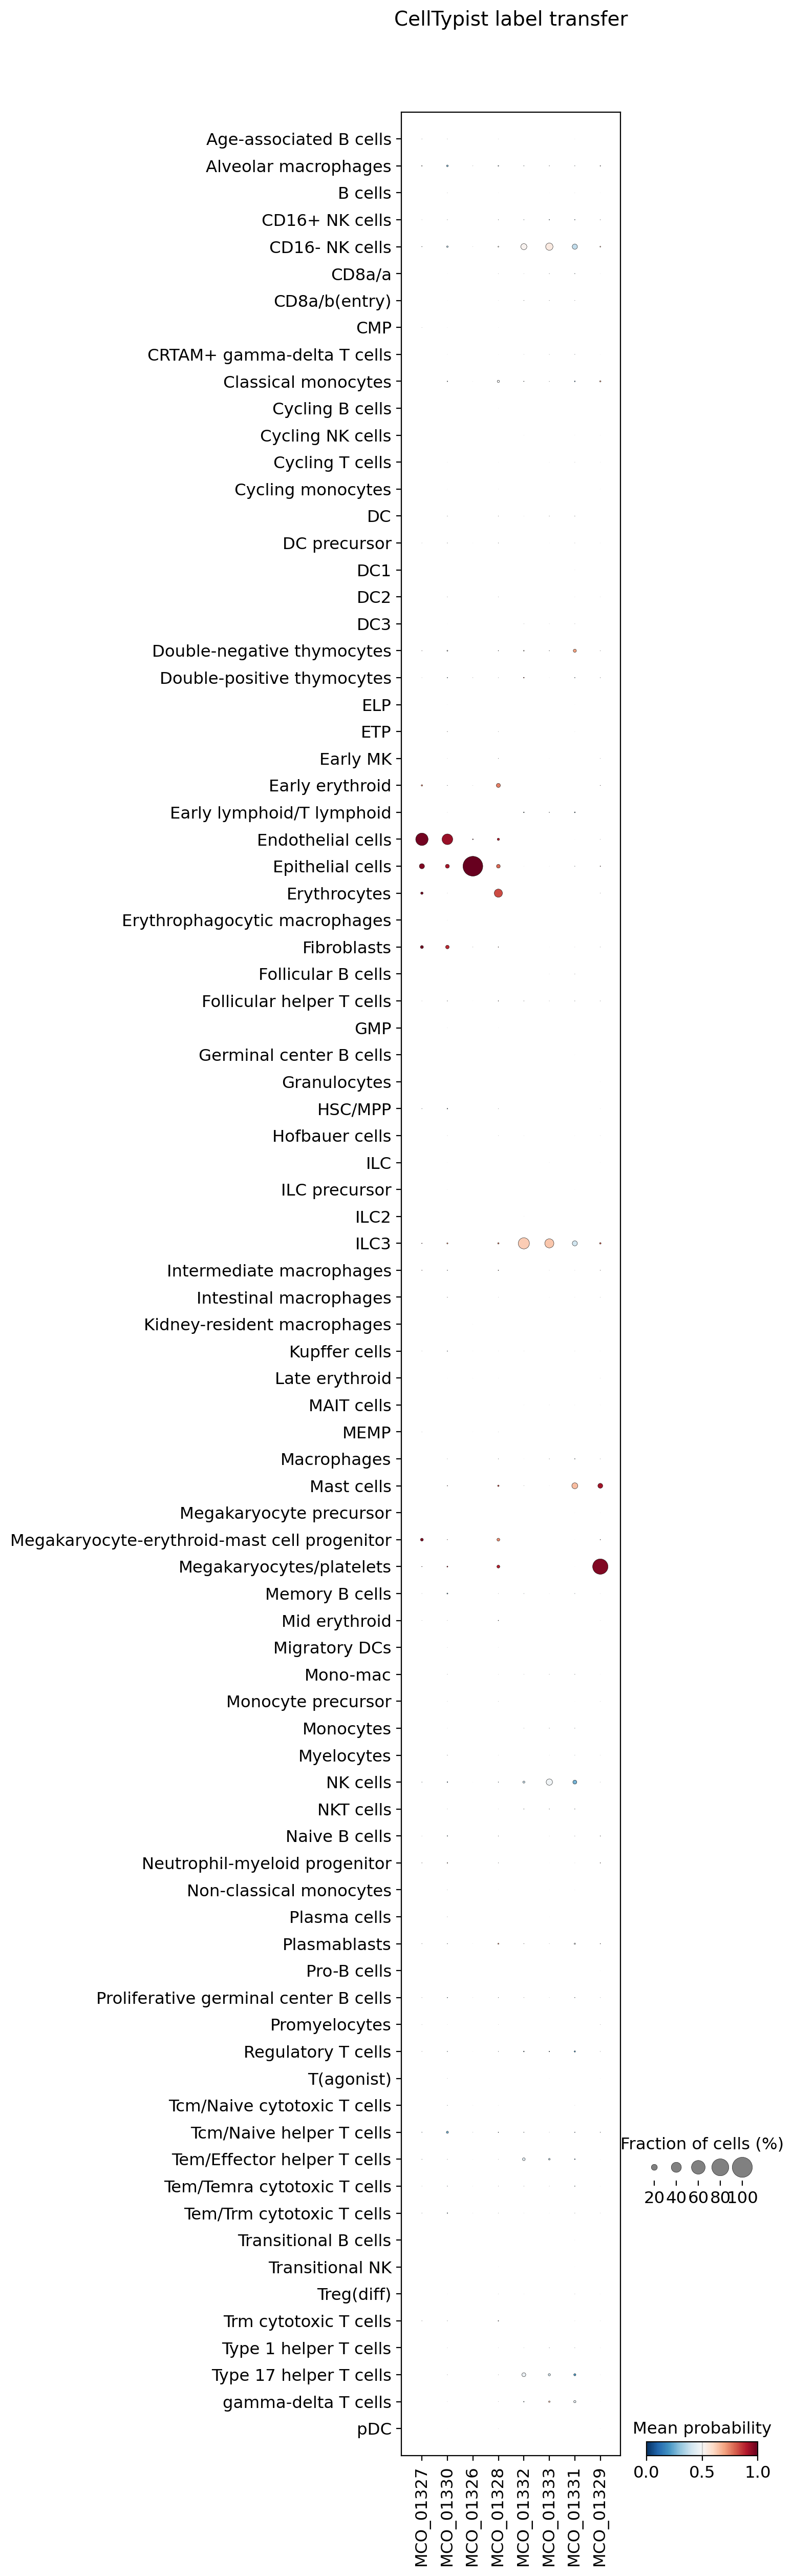

In [107]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save="Immune_ALL_low.pdf")

### save results

In [108]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/Immune_ALL_low_celltypist_prediction.csv')